In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df_id = pd.read_csv('olist_customers_dataset.csv')
df_id.shape
# таблица с уникальными идентификаторами пользователей

# customer_id — позаказный идентификатор пользователя

# customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)

# customer_zip_code_prefix —  почтовый индекс пользователя

# customer_city —  город доставки пользователя

# customer_state —  штат доставки пользователя

(99441, 5)

In [3]:
df_order = pd.read_csv('olist_orders_dataset.csv')
df_order.shape
#  таблица заказов
#     order_id —  уникальный идентификатор заказа (номер чека)

#     customer_id —  позаказный идентификатор пользователя

#     order_status —  статус заказа

#     order_purchase_timestamp —  время создания заказа

#     order_approved_at —  время подтверждения оплаты заказа

#     order_delivered_carrier_date —  время передачи заказа в логистическую службу

#     order_delivered_customer_date —  время доставки заказа

#     order_estimated_delivery_date —  обещанная дата доставки
# Уникальные статусы заказов в таблице olist_orders_dataset:

# created —  создан
# approved —  подтверждён
# invoiced —  выставлен счёт

# processing —  в процессе сборки заказа
# shipped —  отгружен со склада
# delivered —  доставлен пользователю
# unavailable —  недоступен
# canceled —  отменён

(99441, 8)

In [4]:
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_items.shape
# товарные позиции, входящие в заказы
# order_id —  уникальный идентификатор заказа (номер чека)

# order_item_id —  идентификатор товара внутри одного заказа

# product_id —  ид товара (аналог штрихкода)

# seller_id — ид производителя товара

# shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

# price —  цена за единицу товара

# freight_value —  вес товара

(112650, 7)

In [5]:
# Cоберем датафрейм для анализа
df_order_plus_df_items = df_items.merge(df_order, on = 'order_id')


In [6]:
df = df_order_plus_df_items.merge(df_id, on = 'customer_id')
df.shape

(112650, 18)

In [7]:
df = df.dropna()

In [8]:
# 5. Используя pandas, проведи когортный анализ пользователей.
# В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.
# Описание подхода можно найти тут. (15 баллов)

In [9]:
# Retention Rate = ((Количество клиентов на конец периода - Количество новых клиентов за период)
# / Количество клиентов на начало периода) * 100

In [10]:
df = df.query("order_purchase_timestamp !=''")
df.order_purchase_timestamp.agg(['min', 'max'])

min    2016-09-15 12:16:38
max    2018-08-29 15:00:37
Name: order_purchase_timestamp, dtype: object

In [11]:
# Cделаем когортный анализ за 2017 год, т.к. 2016 и 2018 брать не репрезентативно они не полные,
# в 2016 нет нужных по заданию месяцев, а в 2018 не хватает 4х месяцев для анализа.

In [12]:
df = df.query("order_purchase_timestamp > '2016-12-31' and order_purchase_timestamp < '2018-01-01'")

In [13]:
# Приведем дату к формате даты.
df.order_purchase_timestamp = pd.to_datetime(df.order_purchase_timestamp)

In [14]:
# cделаем колонку с указание месяца и года для групировки данных по этим периодам.
df['month_year'] = df.order_purchase_timestamp.dt.strftime('%Y-%m')

In [15]:
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06 00:00:00,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,2017-05
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,2018-01-04 00:00:00,635d9ac1680f03288e72ada3a1035803,16700,guararapes,SP,2017-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,2017-10
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,2017-10
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,2017-10
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,2017-10


In [16]:
# создаем когорты с годом и месяцем, нас интересует первая покупка.
df['cohort_group'] = df.groupby('customer_unique_id')['order_purchase_timestamp']\
                       .transform('min')\
                       .dt.strftime('%Y-%m')


In [17]:
df
#  в столбце когорт груп, минимальная дата заказа у пользователя, в month_year просто дата покупки
# пользователя

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,month_year,cohort_group
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,2017-09,2017-09
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,2017-04,2017-04
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,2017-02,2017-02
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06 00:00:00,85c835d128beae5b4ce8602c491bf385,38017,uberaba,MG,2017-05,2017-05
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,2018-01-04 00:00:00,635d9ac1680f03288e72ada3a1035803,16700,guararapes,SP,2017-12,2017-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112641,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,2017-10,2017-10
112642,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,2017-10,2017-10
112643,fffb9224b6fc7c43ebb0904318b10b5f,4,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,2017-10,2017-10
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,2017-10,2017-10


In [18]:
# объединение груп
cohorts = df.groupby(['cohort_group', 'month_year'])\
            .agg({'customer_unique_id' : 'nunique'})\
            .rename(columns={'customer_unique_id': 'total_clients'})


In [19]:
# количество уникальных пользователей за период
cohorts

total_clients
cohort_group month_year               
2017-01      2017-01               716
             2017-02                 2
             2017-03                 2
             2017-04                 1
             2017-05                 3
...                                ...
2017-10      2017-11                31
             2017-12                11
2017-11      2017-11              7060
             2017-12                40
2017-12      2017-12              5338

[77 rows x 1 columns]

In [20]:
np.arange(len(df)) + 1

array([    1,     2,     3, ..., 49536, 49537, 49538])

In [21]:
# Создаем периоды когорт
def cohort_period(df):
     df['cohort_period'] = np.arange(len(df)) + 1
     return df
cohorts = cohorts.groupby('cohort_group').apply(cohort_period)

In [22]:
cohorts

total_clients  cohort_period
cohort_group month_year                              
2017-01      2017-01               716              1
             2017-02                 2              2
             2017-03                 2              3
             2017-04                 1              4
             2017-05                 3              5
...                                ...            ...
2017-10      2017-11                31              2
             2017-12                11              3
2017-11      2017-11              7060              1
             2017-12                40              2
2017-12      2017-12              5338              1

[77 rows x 2 columns]

In [23]:
cohort_size = cohorts.groupby(['cohort_period', 'cohort_group'])['total_clients']\
                           .agg(lambda x: x.iloc[0])\
                           .groupby('cohort_group')\
                           .agg(lambda x: x.iloc[0])

In [24]:
cohort_size

cohort_group
2017-01     716
2017-02    1616
2017-03    2503
2017-04    2257
2017-05    3450
2017-06    3037
2017-07    3753
2017-08    4057
2017-09    4004
2017-10    4329
2017-11    7060
2017-12    5338
Name: total_clients, dtype: int64

In [25]:
cohorts['total_clients'].unstack(0)

cohort_group,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12
month_year,,,,,,,,,,,,
2017-01,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02,2.0,1616.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03,2.0,3.0,2503.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04,1.0,5.0,11.0,2257.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05,3.0,2.0,9.0,14.0,3450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,7.0,10.0,5.0,16.0,3037.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-07,3.0,2.0,9.0,4.0,16.0,15.0,3753.0,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,4.0,4.0,6.0,10.0,12.0,20.0,4057.0,NaN,NaN,NaN,NaN
2017-09,1.0,3.0,4.0,6.0,10.0,13.0,13.0,28.0,4004.0,NaN,NaN,NaN


In [26]:
# для визуализации поменять местами cohort_group и cohort_period
cohorts.reset_index(inplace=True) #реиндекс
cohorts.set_index(['cohort_group','cohort_period'], inplace=True)

In [32]:
cohorts

month_year  total_clients
cohort_group cohort_period                          
2017-01      1                2017-01            716
             2                2017-02              2
             3                2017-03              2
             4                2017-04              1
             5                2017-05              3
...                               ...            ...
2017-10      2                2017-11             31
             3                2017-12             11
2017-11      1                2017-11           7060
             2                2017-12             40
2017-12      1                2017-12           5338

[77 rows x 2 columns]

In [33]:

# Создадим ряд содержаший размер каждой когорты cohort_group
cohort_size = cohorts['total_clients'].groupby(level=0).agg(lambda x: x.iloc[0])
cohorts['total_clients'].unstack(0)
retention = cohorts['total_clients'].unstack(0).divide(cohort_size, axis=1)

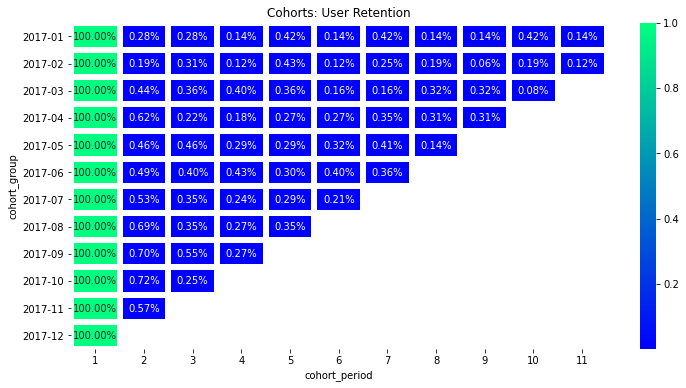

In [34]:
plt.subplots(figsize=(12, 6))
plt.title('Cohorts: User Retention')
sns.heatmap(retention.T,  annot=True, fmt='.2%', linewidths=5, cmap='winter')

In [31]:
# # 
# Когорта с максимальным значеним покупок три месяца подряд после первой,
# в переод с 01-2017 по 12-2017 - это когорта покупателей с первой покупкой совершонной 2017-09